In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/Administrator/Downloads/archive (2)/training.1600000.processed.noemoticon.csv",encoding='latin1')

In [3]:
print(df.shape)

(1048572, 6)


In [4]:
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1048572 entries, 0 to 1048571

Data columns (total 6 columns):

 #   Column              Non-Null Count    Dtype 

---  ------              --------------    ----- 

 0   polarity of tweet   1048572 non-null  int64 

 1   id of the tweet     1048572 non-null  int64 

 2   date of the tweet   1048572 non-null  object

 3   query               1048572 non-null  object

 4   user                1048572 non-null  object

 5   text of the tweet   1048572 non-null  object

dtypes: int64(2), object(4)

memory usage: 48.0+ MB


In [6]:
df.describe()

,polarity of tweet,id of the tweet
count,1.048572e+06,1.048572e+06
mean,9.482458e-01,1.976168e+09
std,1.701122e+00,2.300567e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.824526e+09
50%,0.000000e+00,1.990870e+09
75%,0.000000e+00,2.198903e+09
max,4.000000e+00,2.329206e+09


In [7]:
df.isnull().sum()

polarity of tweet     0
id of the tweet       0
date of the tweet     0
query                 0
user                  0
text of the tweet     0
dtype: int64

In [8]:
df.drop(['id of the tweet', 'date of the tweet', 'query', 'user'], axis=1, inplace=True)
df.head()

,polarity of tweet,text of the tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [74]:
df.columns = ['sentiment', 'text']

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1048572 entries, 0 to 1048571

Data columns (total 2 columns):

 #   Column     Non-Null Count    Dtype 

---  ------     --------------    ----- 

 0   sentiment  1048572 non-null  int64 

 1   text       1048572 non-null  object

dtypes: int64(1), object(1)

memory usage: 16.0+ MB


In [76]:
df['sentiment'].value_counts()

sentiment
0    799996
4    248576
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='Count'>

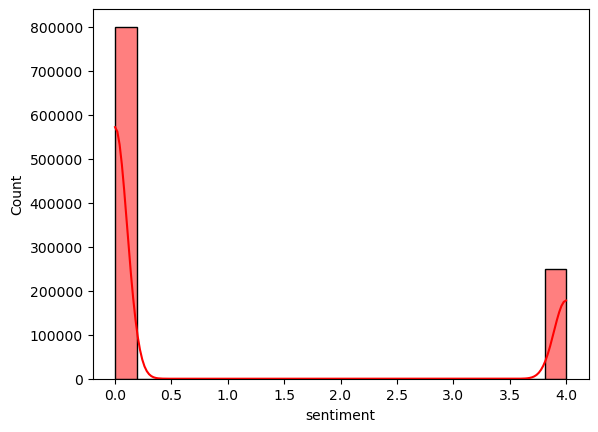

In [77]:
sns.histplot(df['sentiment'], kde=True, color = 'r')

<Axes: xlabel='sentiment', ylabel='count'>

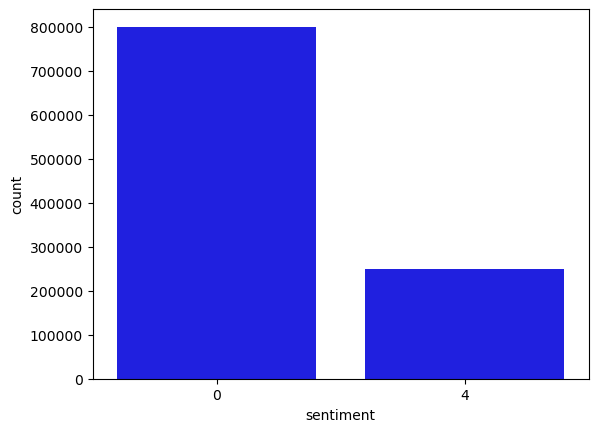

In [78]:
sns.countplot(x=df['sentiment'] , color= 'b')

In [14]:
word_tokens = [word_tokenize(i) for i in df["text"]]

In [15]:
word_tokens[:3]

[['is',
  'upset',
  'that',
  'he',
  'ca',
  "n't",
  'update',
  'his',
  'Facebook',
  'by',
  'texting',
  'it',
  '...',
  'and',
  'might',
  'cry',
  'as',
  'a',
  'result',
  'School',
  'today',
  'also',
  '.',
  'Blah',
  '!'],
 ['@',
  'Kenichan',
  'I',
  'dived',
  'many',
  'times',
  'for',
  'the',
  'ball',
  '.',
  'Managed',
  'to',
  'save',
  '50',
  '%',
  'The',
  'rest',
  'go',
  'out',
  'of',
  'bounds'],
 ['my', 'whole', 'body', 'feels', 'itchy', 'and', 'like', 'its', 'on', 'fire']]

In [16]:
removal = RegexpTokenizer(r"\w+")

In [17]:
new_sentiments = [removal.tokenize(i) for i in df["text"]]

In [18]:
new_sentiments[:3]

[['is',
  'upset',
  'that',
  'he',
  'can',
  't',
  'update',
  'his',
  'Facebook',
  'by',
  'texting',
  'it',
  'and',
  'might',
  'cry',
  'as',
  'a',
  'result',
  'School',
  'today',
  'also',
  'Blah'],
 ['Kenichan',
  'I',
  'dived',
  'many',
  'times',
  'for',
  'the',
  'ball',
  'Managed',
  'to',
  'save',
  '50',
  'The',
  'rest',
  'go',
  'out',
  'of',
  'bounds'],
 ['my', 'whole', 'body', 'feels', 'itchy', 'and', 'like', 'its', 'on', 'fire']]

In [19]:
new_strings = [" ".join(i) for i in new_sentiments]

In [20]:
new_strings[:3]

['is upset that he can t update his Facebook by texting it and might cry as a result School today also Blah',
 'Kenichan I dived many times for the ball Managed to save 50 The rest go out of bounds',
 'my whole body feels itchy and like its on fire']

In [21]:
sw = set(stopwords.words("english"))

In [22]:
new_str_tokens = [word_tokenize(i) for i in new_strings]

In [23]:
new_str_tokens[:3]

[['is',
  'upset',
  'that',
  'he',
  'can',
  't',
  'update',
  'his',
  'Facebook',
  'by',
  'texting',
  'it',
  'and',
  'might',
  'cry',
  'as',
  'a',
  'result',
  'School',
  'today',
  'also',
  'Blah'],
 ['Kenichan',
  'I',
  'dived',
  'many',
  'times',
  'for',
  'the',
  'ball',
  'Managed',
  'to',
  'save',
  '50',
  'The',
  'rest',
  'go',
  'out',
  'of',
  'bounds'],
 ['my', 'whole', 'body', 'feels', 'itchy', 'and', 'like', 'its', 'on', 'fire']]

In [24]:
updated_strings = [[word for word in i if not word in sw] for i in new_str_tokens]

In [25]:
updated_strings[:3]

[['upset',
  'update',
  'Facebook',
  'texting',
  'might',
  'cry',
  'result',
  'School',
  'today',
  'also',
  'Blah'],
 ['Kenichan',
  'I',
  'dived',
  'many',
  'times',
  'ball',
  'Managed',
  'save',
  '50',
  'The',
  'rest',
  'go',
  'bounds'],
 ['whole', 'body', 'feels', 'itchy', 'like', 'fire']]

In [26]:
dummy_str = [" ".join(i) for i in updated_strings]
dummy_str[:3]

['upset update Facebook texting might cry result School today also Blah',
 'Kenichan I dived many times ball Managed save 50 The rest go bounds',
 'whole body feels itchy like fire']

In [27]:
df["text"] = dummy_str

In [28]:
df.head()

,polarity of tweet,text
0,0,upset update Facebook texting might cry result...
1,0,Kenichan I dived many times ball Managed save ...
2,0,whole body feels itchy like fire
3,0,nationwideclass behaving mad I see
4,0,Kwesidei whole crew


In [79]:
df["sentiment"].value_counts()

sentiment
0    799996
4    248576
Name: count, dtype: int64

In [80]:
df["sentiment"].unique()

array([0, 4], dtype=int64)

In [31]:
tokenizer = Tokenizer()

In [33]:
tokenizer.fit_on_texts(df["text"])

In [34]:
tokens = tokenizer.texts_to_sequences(df["text"])

In [35]:
tokens[:5]

[[543, 465, 466, 2114, 227, 364, 2276, 72, 9, 212, 920],
 [24460, 1, 56333, 237, 291, 1268, 1637, 810, 1062, 48, 424, 4, 25818],
 [348, 680, 371, 2307, 5, 1157],
 [41616, 10510, 448, 1, 29],
 [154855, 348, 2364]]

In [36]:
vocab_size = len(tokenizer.word_index)+1

In [37]:
vocab_size

467923

In [38]:
seq = tokenizer.texts_to_sequences(df["text"])

In [39]:
seq[:5]

[[543, 465, 466, 2114, 227, 364, 2276, 72, 9, 212, 920],
 [24460, 1, 56333, 237, 291, 1268, 1637, 810, 1062, 48, 424, 4, 25818],
 [348, 680, 371, 2307, 5, 1157],
 [41616, 10510, 448, 1, 29],
 [154855, 348, 2364]]

In [101]:
pad_seq = pad_sequences(seq, maxlen=35, padding="post")

In [102]:
pad_seq

array([[   543,    465,    466, ...,      0,      0,      0],
       [ 24460,      1,  56333, ...,      0,      0,      0],
       [   348,    680,    371, ...,      0,      0,      0],
       ...,
       [467921,    123,      5, ...,      0,      0,      0],
       [ 53218,     14,     62, ...,      0,      0,      0],
       [    81,     96,    445, ...,      0,      0,      0]])

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()

In [81]:
labels = le.fit_transform(df["sentiment"])

In [82]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [83]:
df.head()

,sentiment,text
0,0,upset update Facebook texting might cry result...
1,0,Kenichan I dived many times ball Managed save ...
2,0,whole body feels itchy like fire
3,0,nationwideclass behaving mad I see
4,0,Kwesidei whole crew


In [104]:
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=5))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [105]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [108]:
model.fit(pad_seq, labels, epochs=10)

Epoch 1/10

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 183s 6ms/step - accuracy: 0.8576 - loss: 0.3322

Epoch 2/10

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 246s 8ms/step - accuracy: 0.8576 - loss: 0.3324

Epoch 3/10

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 257s 8ms/step - accuracy: 0.8578 - loss: 0.3324

Epoch 4/10

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 257s 8ms/step - accuracy: 0.8577 - loss: 0.3314

Epoch 5/10

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 256s 8ms/step - accuracy: 0.8578 - loss: 0.3318

Epoch 6/10

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 254s 8ms/step - accuracy: 0.8589 - loss: 0.3307

Epoch 7/10

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 4496s 137ms/step - accuracy: 0.8593 - loss: 0.3302

Epoch 8/10

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 244s 7ms/step - accuracy: 0.8591 - loss: 0.3300

Epoch 9/10

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 224s 7ms/step - accuracy: 0.8589 - loss: 0.3295

Epoch 10/10

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 216s 7ms/step - accuracy: 0.8595 - loss: 0.3295


In [134]:
new_text = "I am happy, As I scored good marks in test"

In [135]:
new_tokens = tokenizer.texts_to_sequences([new_text])

In [136]:
new_tokens

[[1, 503, 76, 977, 1, 5267, 7, 3955, 279, 555]]

In [137]:
new_pad_seq = pad_sequences(new_tokens, maxlen=35, padding="post")

In [138]:
new_pad_seq

array([[   1,  503,   76,  977,    1, 5267,    7, 3955,  279,  555,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]])

In [139]:
predictions = model.predict(new_pad_seq)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Negetive Sentiment");
else:
    print("Positive Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Positive Sentiment
